In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_geran_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Geraniol
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
3,12,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
4,21,0.412179,-0.004705,-0.130429,0.000645,-0.119390,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Geraniol'], axis = 1)
y = df_rf[['X..Geraniol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

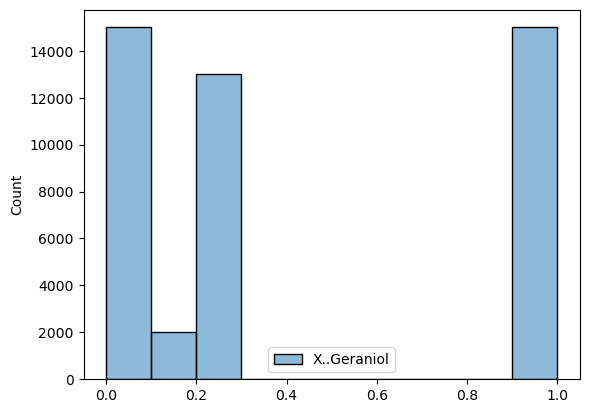

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3755/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.026227599178033002

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.007130057131041727

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08443966562606538

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9854420167071744

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.961468177138504

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.108579
1,lsa_1,0.108598
2,lsa_2,0.127621
3,lsa_3,0.092450
4,lsa_4,0.101814
...,...,...
81,tree,0.001651
82,tropical,0.001260
83,vanilla,0.003923
84,violet,0.000147


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
5,hybrid,1.671852e-01
2,lsa_2,1.276215e-01
1,lsa_1,1.085985e-01
0,lsa_0,1.085787e-01
4,lsa_4,1.018144e-01
3,lsa_3,9.244952e-02
50,diesel,2.648753e-02
64,orange,1.626450e-02
77,sweet,1.567943e-02
48,citrus,1.524220e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.10251579e-01, 1.07546824e-01, 1.22138906e-01, 9.47331351e-02,
       1.05011843e-01, 1.67309285e-01, 2.00171030e-07, 1.97793730e-07,
       2.33080817e-04, 2.26739476e-03, 4.01761232e-03, 0.00000000e+00,
       7.39996958e-03, 2.36200479e-04, 7.49397035e-03, 5.22294052e-03,
       8.10621435e-03, 8.27919861e-03, 1.99483666e-06, 7.90990419e-03,
       1.85391238e-06, 8.89199474e-08, 8.44503597e-03, 4.36355550e-03,
       5.78609298e-03, 3.18962297e-03, 6.06560054e-03, 2.85709727e-04,
       0.00000000e+00, 3.58995019e-03, 9.70180967e-03, 3.84224023e-06,
       7.30688175e-03, 0.00000000e+00, 0.00000000e+00, 9.12674354e-03,
       5.19921897e-03, 6.05436589e-03, 1.31463556e-04, 1.20591236e-04,
       2.30544479e-05, 5.78804893e-03, 8.10104562e-05, 2.67158700e-03,
       6.79240192e-04, 6.08503733e-03, 4.12444055e-04, 1.47398508e-05,
       1.54536024e-02, 1.17555564e-04, 2.63177886e-02, 5.69262717e-03,
       3.98643938e-03, 1.70091113e-03, 3.24114592e-03, 1.40507292e-03,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,citrus,diesel,lemon,orange,sweet
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,0
1,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0
2,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,0,1
3,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,0,1
4,0.412179,-0.004705,-0.130429,0.000645,-0.119390,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
44995,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0,0,0
44996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0,0
44997,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
44998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_geran.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_geran.pkl")

['selected_X_rf_lsa_elbow_geran.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3755/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.027784736257760838

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.008534251318926567

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0923810116794927

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9770702476552171

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9538213001769934

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_geran.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_geran.pkl")

['rscv_rf_lsa_elbow_best_params_geran.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 5, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3755/2128060692.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.027915565480265563

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.0075137390678403585

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08668182662957881

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9782525022963536

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9593432759364954

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_geran.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_geran.pkl")

['y_test_rfreg_lsa_elbow_geran.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.028887081170272957

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.00803146428394013

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.08961843718755717

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9563629982941843

Error analysis

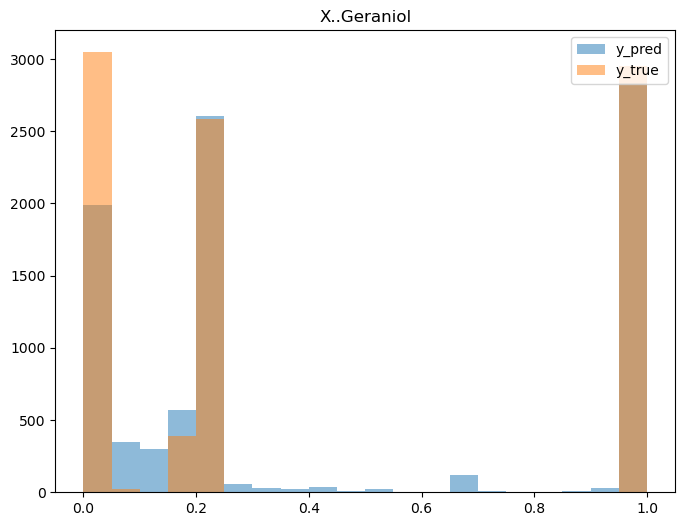

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Geraniol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_geran.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.979
P-value: 0.000


<Axes: >

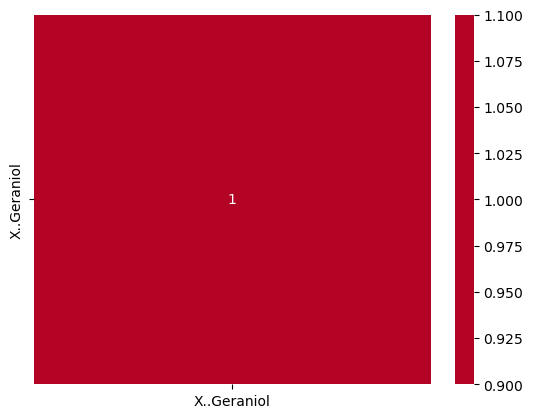

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)